# 6. K Means Algorithm

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the Iris dataset
df = sns.load_dataset("iris")

# Display the first few rows of the dataset
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# Shows a tuple with row and column size
df.shape 

(150, 5)

In [5]:
# Display a concise summary of the DataFrame, including the number of non-null entries and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Get the description of the dataset
description = df.describe()
print(description)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 1.Sepal Length vs Sepal Width Distribution Across Species
Different species exhibit varying distributions of sepal length and width. This scatter plot can help us understand how the species are separated based on these two features.

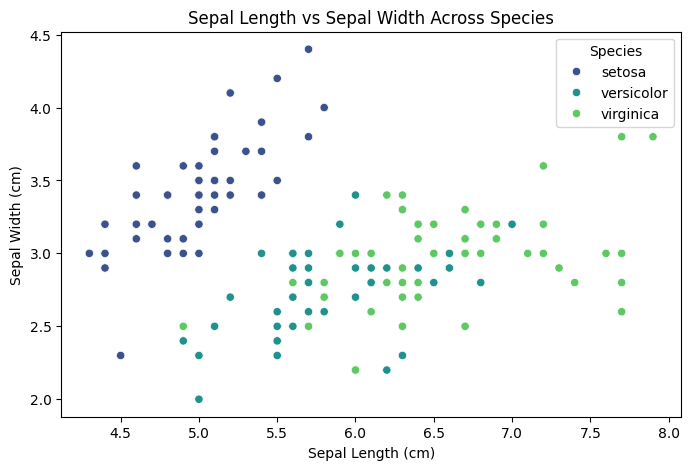

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='viridis')
plt.title("Sepal Length vs Sepal Width Across Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

### 2.Petal Length vs Petal Width Variation Across Species
Petal dimensions are more useful in distinguishing different species compared to sepal dimensions.

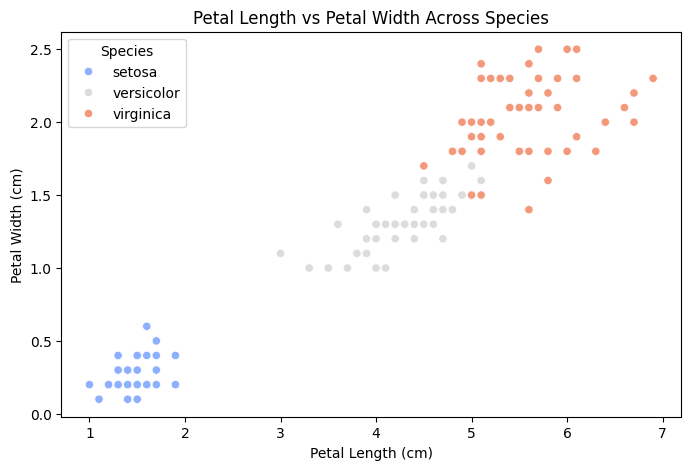

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='coolwarm')
plt.title("Petal Length vs Petal Width Across Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()


### 3.Boxplot of Sepal Length for Each Species
This helps visualize how the sepal length varies across different species and highlights any outliers.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18004\3733571508.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


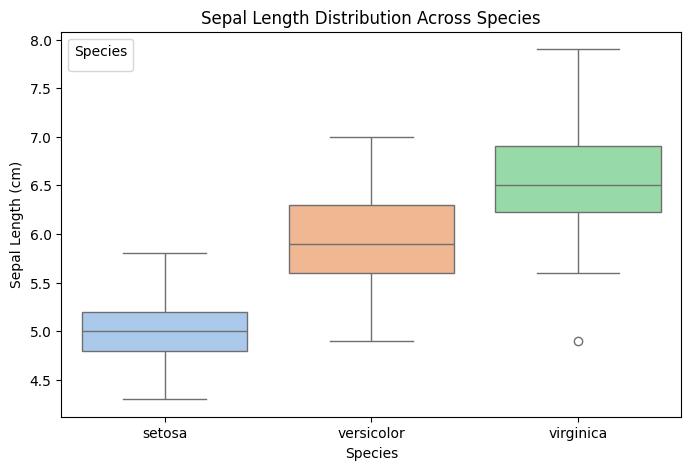

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='sepal_length', data=df, hue='species', palette='pastel', dodge=False)
plt.title("Sepal Length Distribution Across Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.legend(title="Species")
plt.show()


In [10]:
# Extract features (we'll use only sepal length and sepal width)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]


In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Finding the Optimal Number of Clusters (Elbow Method)

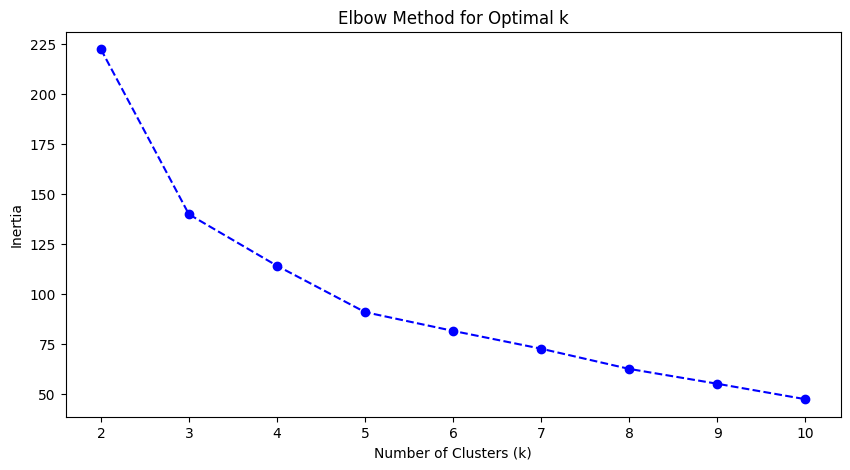

In [12]:
inertia = []
K_range = range(2, 11)

# Compute inertia for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Fit model
    inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


Compute Silhouette Scores

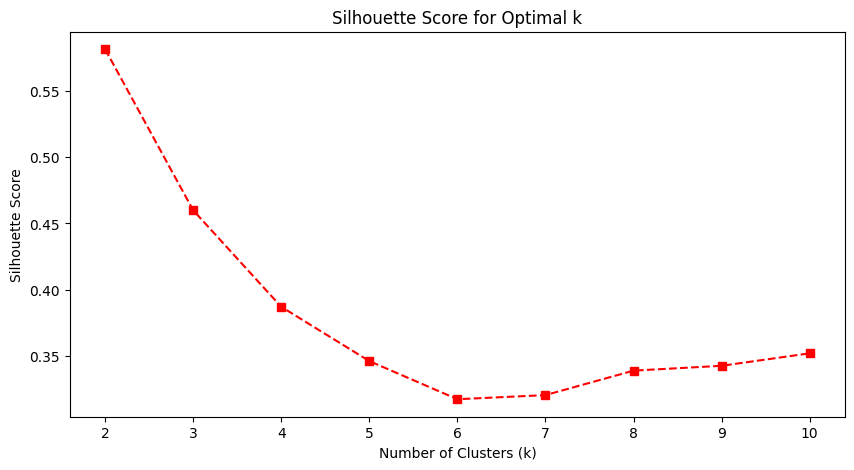

In [13]:
# List to store silhouette scores
silhouette_scores = []

# Compute silhouette score for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Store silhouette score

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()



In [14]:
#Apply K-Means with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Get cluster centers
centers = kmeans.cluster_centers_

Evaluate Clustering Performance

In [15]:
from sklearn.metrics import confusion_matrix

# Convert species labels to numeric for comparison
true_labels = df['species'].astype('category').cat.codes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, df['cluster'])

# Display confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=[f'Cluster {i}' for i in range(optimal_k)], 
                              index=df['species'].unique())
print("Confusion Matrix:\n", conf_matrix_df)



Confusion Matrix:
             Cluster 0  Cluster 1  Cluster 2
setosa              0         50          0
versicolor         39          0         11
virginica          14          0         36


In [16]:
# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.460


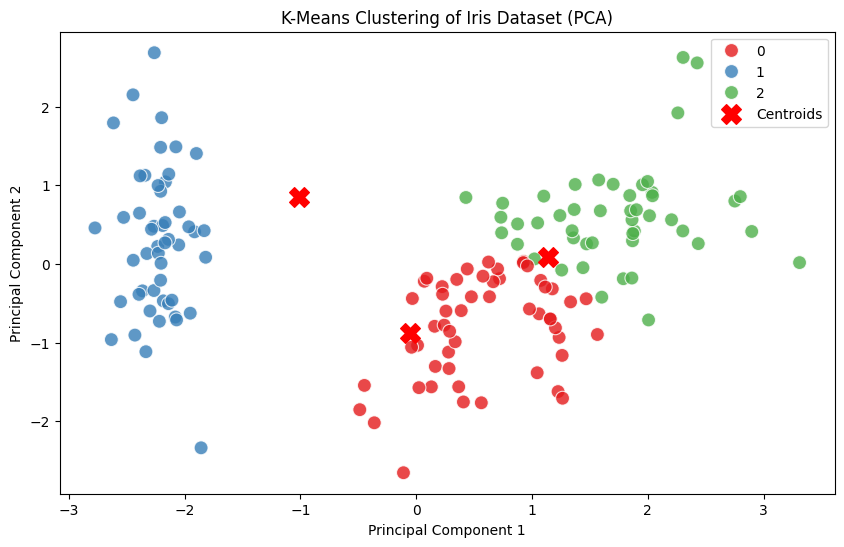

In [17]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and cluster labels to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='Set1', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_18004\477874657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='coolwarm')


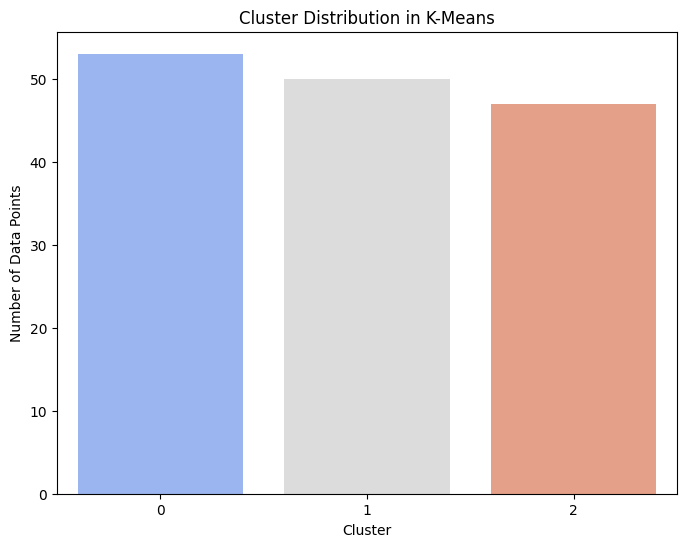

In [18]:
# Cluster Distribution Analysis (Number of data points in each cluster)
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df, palette='coolwarm')
plt.title("Cluster Distribution in K-Means")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.show()

Gaussian Mixture Model (GMM) and DBSCAN were included as alternative clustering approaches. GMM assumes the data comes from a mix of normal distributions, while DBSCAN groups points based on density and handles noise effectively and compared  the performance of all clustering methods using Adjusted Rand Index



In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Train GMM with the same number of clusters (based on the elbow method)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Add GMM clusters to the dataset
df["GMM_Cluster"] = gmm_clusters

# Evaluate GMM clustering performance using Silhouette Score
gmm_sil_score = silhouette_score(X_scaled, gmm_clusters)
print(f"Silhouette Score (GMM): {gmm_sil_score:.2f}")

Silhouette Score (GMM): 0.23


In [20]:
from sklearn.cluster import DBSCAN
# Train DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # You can tune eps and min_samples
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Add DBSCAN clusters to the dataset
df["DBSCAN_Cluster"] = dbscan_clusters

# Evaluate DBSCAN clustering performance using Silhouette Score
dbscan_sil_score = silhouette_score(X_scaled, dbscan_clusters)
print(f"Silhouette Score (DBSCAN): {dbscan_sil_score:.2f}")

Silhouette Score (DBSCAN): 0.50


In [21]:
# Optionally, compare the performance of all clustering methods using Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score

# Adjusted Rand Index (ARI) for K-Means vs. GMM
ari_kmeans_gmm = adjusted_rand_score(df["cluster"], df["GMM_Cluster"])
# Adjusted Rand Index (ARI) for K-Means vs. DBSCAN
ari_kmeans_dbscan = adjusted_rand_score(df["cluster"], df["DBSCAN_Cluster"])

print(f"Adjusted Rand Index (K-Means vs. GMM): {ari_kmeans_gmm:.2f}")
print(f"Adjusted Rand Index (K-Means vs. DBSCAN): {ari_kmeans_dbscan:.2f}")

Adjusted Rand Index (K-Means vs. GMM): 0.48
Adjusted Rand Index (K-Means vs. DBSCAN): 0.56
